<font color=blue>ANALYSIS OF FANDANGO MOVIE RATINGS</font>

<font color=blue>QUESTION:</font>

Did Fandango continue inflating their movie ratings in 2016-2017 after "correcting" the problem in 2015?

<font color=blue>Evaluation of these data sources:</font>

- 2016- 2017 data set contains the 214 "most voted and reviewed" movies.
- 2015 data set contains 146 movies which obtained at least 30 fan reviews on Fandango.

Given this information, the movie sampling in both data sets was not random, but stratified towards movies receiving greater votes and reviews. The scope of our answer to QUESTION is limited to this stratification.

Also, the sampling requirements for both datasets are different ("most voted and reviewed" vs. "at least 30 fan reviews"). This should also be considered in our answer to QUESTION.


In [1]:
import pandas as pd
ratings_15 = pd.read_csv('fandango_score_comparison.csv')
ratings_15.head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.7,4.3,...,3.9,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5


In [2]:
ratings_15.shape

(146, 22)


Note:Some of these movies were actually released in 2014 per the title.  Let's filter those out

In [5]:
just_yr_15 = ratings_15['FILM'].str.extract('(201[45])')
just_yr_15.rename(columns = {0: 'Year'}, inplace = True)

In [6]:
# merge just-yr_15 into ratings_15
r15_merge = ratings_15.merge(right = just_yr_15, 
                             left_index = True, right_index = True)

In [8]:
#only year 2015
fan_15 = r15_merge[r15_merge['Year'] == '2015']
fan_15.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,2015
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,2015


In [9]:
# only Fandango info
fan_15 = fan_15[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", 
                "Fandango_votes", "Fandango_Difference"]]

In [10]:
fan_15.reset_index(drop = True, inplace = True)
fan_15.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


*2015 Fandango Data Set now ready*

In [13]:
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')
ratings_16_17.head(2)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.8,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.4,3.65,2.5,4.15,2.5,3.5,2.5,4.0


In [14]:
ratings_16_17.shape

(214, 15)

In [15]:
# new dfs with Fandango columns
fan_15 = ratings_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fan_16_17 = ratings_16_17[['movie', 'year','fandango', ]].copy()
print(fan_15.columns)
print(fan_16_17.columns)

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')
Index(['movie', 'year', 'fandango'], dtype='object')


In [16]:
fan_16_17.year.value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [17]:
#from fan_16_17, extract movies released in 2016
fan_16 = fan_16_17[fan_16_17['year'] == 2016].copy()

Note:  Fandango no longer posts it's movie reviews (replaced by Rotten Tomatoes) so I can't check whether the fan_16 movies have a large number of fan reviews

In [18]:
fan_16.reset_index(drop = True, inplace = True)

In [20]:
fan_16.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Hologram for the King,2016,3.0
4,A Monster Calls,2016,4.0


*2016 Fandango Data Set now ready*

<font color=blue>INSTRUCTIONS:</font>

- Create kernel density plots on the same figure for the distribution of movie ratings.

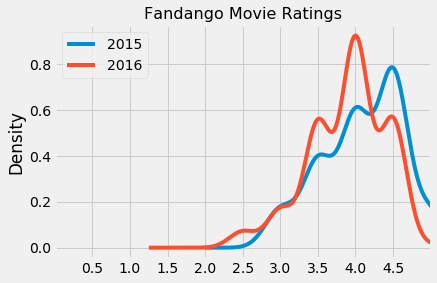

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
fan_15['Fandango_Stars'].plot.kde(label = '2015')
fan_16['fandango'].plot.kde(label = '2016')
plt.title('Fandango Movie Ratings', fontsize = 16)
plt.xlim(0,5)
plt.xticks([.5,1,1.5,2,2.5,3,3.5,4,4.5])
plt.legend()
plt.show()



In [22]:
print("2015 Score %")
print(
       (fan_15['Fandango_Stars'].value_counts(normalize = True)*100
       ).sort_index()
     )
print("\n")
print("2016 Score %")
print(
       (fan_16['fandango'].value_counts(normalize = True)*100
       ).sort_index()
     )

2015 Score %
3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64


2016 Score %
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In [23]:
fan_15_mean= fan_15['Fandango_Stars'].mean()
fan_15_median= fan_15['Fandango_Stars'].median()
fan_15_mode= float((fan_15['Fandango_Stars'].mode()))
fan_16_mean= fan_16['fandango'].mean()
fan_16_median= fan_16['fandango'].median()
fan_16_mode= float((fan_16['fandango'].mode()))

In [24]:
stats_sum = pd.DataFrame()
stats_sum["2015"] = [fan_15_mean,fan_15_median,fan_15_mode]
stats_sum["2016"] = [fan_16_mean,fan_16_median,fan_16_mode]
stats_sum.index = ['Mean', 'Median', 'Mode']

stats_sum

,2015,2016
Mean,4.089041,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


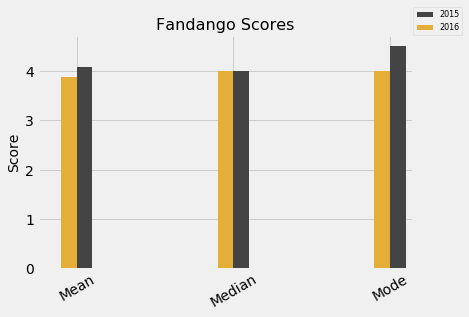

In [25]:
plt.style.use("fivethirtyeight")
stats_sum["2015"].plot.bar(color = "#444444",width = .1, 
                           align = 'edge', label = '2015')
stats_sum["2016"].plot.bar( color = "#e5ae38", width = -.1, 
                           align = 'edge', label = '2016')

plt.title('Fandango Scores', fontsize = 16)
plt.ylabel('Score', fontsize = 14)
plt.xticks(rotation = 30)
plt.legend(loc = (1,1),fontsize = 8)
plt.show()

<font color=red>OBSERVATIONS AND CONCLUSIONS</font>

- Both distributions are skewed left (tend to have high scores), although 2016 is less skewed than 2015.
- 2016 scores have shifted to lower values compared to 2015, with 2016 having movies getting a 2.5 score.
- 2016 mode is 4.0, while 2015 is 4.5.

2016 movies tend to have lower Fandango scores than 2015 movies.